# Mushroom Edibility Classification

**Link**

https://www.kaggle.com/uciml/mushroom-classification

**Context**

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

**Content**

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified through the target attribute `class` as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.

The dataset consists of the following attributes:
- class - edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

**Task (Classification)**

Your task is to use the present data set to predict the edibility of a mushroom sample. To do this, use the `Logistic Regression` and `XGBoost` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

# 1. Framing the problem

The primary objective of this project is to estimate the probability that a given mushroom sample is edible, based on various features such as gill size, cap color, and other morphological characteristics. 

The resulting machine learning models could potentially be integrated into a broader **"mushroom guidance" application**. In such an app, users could take a photo of a mushroom, and the system would provide an initial estimate of its edibility. This approach frames the problem as a supervised learning classification task, where performance can be measured using metrics such as accuracy, precision, and recall. Thus, besides a full-feature model, a more specified "user" model trained on a reduced feature space solely including visual features has been implemented.
Given the real-world risk of misclassification, particular attention must be paid to minimizing false positives (i.e., predicting a poisonous mushroom as edible). While a reliable system would need to exceed a defined accuracy threshold to be considered practical, the aim of this project is to assess feasibility.

Nonetheless, real-life expertise should not be disregarded. The application could also support experts by providing a second opinion, comparable to how machine learning assists doctors with diagnostics in fields like radiology. This hybrid approach (combining expert knowledge with algorithmic estimation) could lead to more robust and safer classification outcomes.

# 2. Getting the data
 
The data has been downloaded and stored in CSV format to facilitate loading and manipulation within standard data science tools such as Pandas. A copy from the original data was created to perform the following data analysis and model training steps on.

**Außerdem zu erwähnen**:
- mussten manche Daten hinzugefügt werden weil "?"- oder "NaN"-Eintrag ?
- 

In [26]:
# ─── Standard Library ─────────────────────────────────────────────────
import os
import pickle
import warnings
from itertools import combinations

# suppress warnings globally
warnings.filterwarnings("ignore")

# ─── Data Handling ───────────────────────────────────────────────────
import numpy as np
import pandas as pd

# ─── Visualization ───────────────────────────────────────────────────
import matplotlib.pyplot as plt
import seaborn as sns

# ─── Statistical Tests & Distributions ───────────────────────────────
import scipy.stats as st 
from scipy.stats import chi2_contingency, uniform

# ─── Preprocessing & Pipelines ───────────────────────────────────────
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# ─── Model Selection & Feature Selection ─────────────────────────────
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# ─── Machine Learning Models ─────────────────────────────────────────
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import DMatrix, XGBClassifier

# ─── Evaluation Metrics & Utilities ──────────────────────────────────
from IPython.display import display
from sklearn.metrics import (
    accuracy_score,
    auc,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay,
)


In [27]:
df_raw = pd.read_csv(r'data/mushrooms.csv')
print(f"Raw Data: {df_raw.shape[0]} rows, {df_raw.shape[1]} columns")


# create copies of the original DataFrame
df = df_raw.copy()

df.get('veil-type').value_counts() # veil-type is constant, so we can drop it
df.drop(columns=['veil-type'], inplace=True)

Raw Data: 8124 rows, 23 columns


# 3. Exploring the data


The dataset, sourced from the UCI Machine Learning Repository, consists of 8,124 complete samples with no missing values. It includes 23 categorical features, each representing a specific characteristic of mushrooms, such as cap-shape, odor, veil-color, and habitat. All variables are categorical, with varying cardinality: while some, like the target variable edibility, are binary, others, such as gill-color, contain more than 10 distinct categories. 

In [28]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [29]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

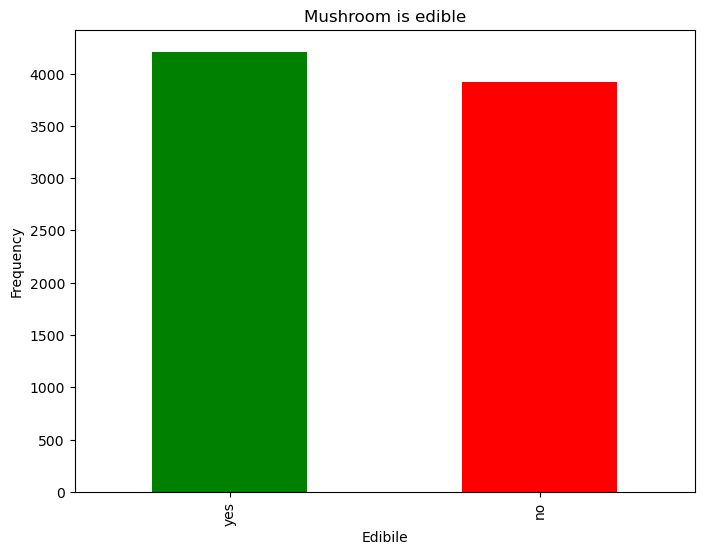

In [31]:
# Bar plot for Column 0 "edible"
df.iloc[:,0] = df.iloc[:,0].replace("e","yes") # replacing e with yes
df.iloc[:,0] = df.iloc[:,0].replace("p","no")  # replacing p with no

plt.figure(figsize=(8, 6))
df['class'].value_counts().plot(kind='bar', color=["green", "red"], label='Edible')
plt.title('Mushroom is edible')
plt.xlabel('Edibile')
plt.ylabel('Frequency')
plt.show()

**Paried Bar Plots**

Paired bar plots a used for visualizing the depemdencies of single attributes in a better way than usual bar plots. They are similar to usual bar plots but with bars for each value of an attribute.

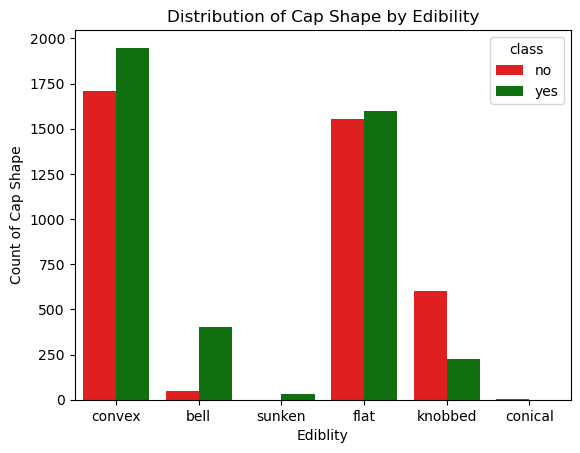

In [32]:
# 'paired bar' plots are used for visualizing the dependecies of single attributes.

shape_names = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}

labeled_data = df.copy() # using the previously defined shape_names dict the full names on the x-axis can be displayed
labeled_data['cap-shape'] = labeled_data['cap-shape'].map(shape_names)

palette = {'yes': 'green', 'no': 'red'}

sns.countplot(x='cap-shape', hue='class', data=labeled_data, palette=palette)
                                                     
plt.title('Distribution of Cap Shape by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('Count of Cap Shape')
plt.show()

First paired bar plot shows the attribute cap shape. The distribution is partial balanced but some values are not represented well like sunken or conical. Also it shows that cap shape is not a very good attribute to make a pre decision whether a mushroom is edible or not.

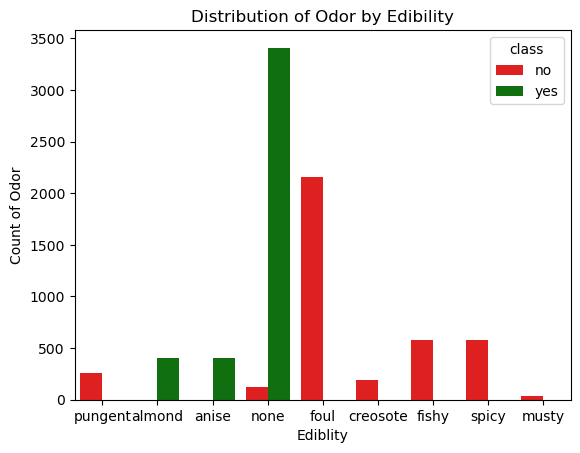

In [33]:
odor_names = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}

labeled_data = df.copy()
labeled_data['odor'] = labeled_data['odor'].map(odor_names)

palette = {'yes': 'green', 'no': 'red'}

sns.countplot(x='odor', hue='class', data=labeled_data, palette=palette)   
                                                          
plt.title('Distribution of Odor by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('Count of Odor')
plt.show()

This paired bar plot demonstrates the importance of the 'oder' attribute to indicate edibility. But it has to been taken with care because in this dataset there are no poisonous mushrooms with anise oder for insance but in reality there are like Clitocybe fragrans.

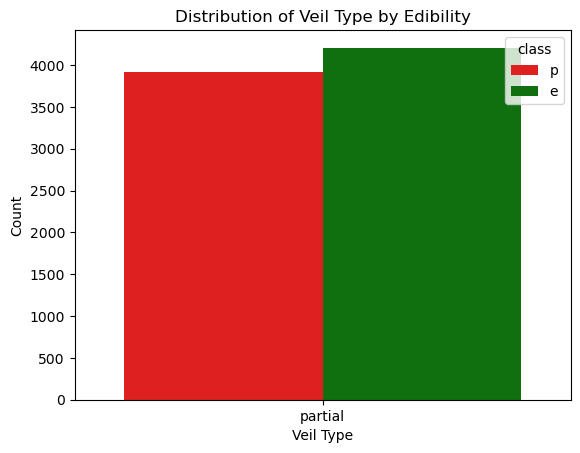

In [34]:
# Define mapping from code to descriptive veil type names
veil_type_names = {'p': 'partial', 'u': 'universal'}

# Work on a copy of the raw data so we can map and visualize without losing the original
labeled_data = df_raw.copy()

# Map the veil-type codes ('p','u') to their full names
labeled_data['veil-type'] = labeled_data['veil-type'].map(veil_type_names)

# Define a palette that matches the actual class codes:
# 'e' = edible, 'p' = poisonous
palette = {'e': 'green', 'p': 'red'}

# Plot the count of each veil type, separated by edibility class
sns.countplot(
    x='veil-type', 
    hue='class', 
    data=labeled_data, 
    palette=palette
)  # This paired bar plot shows how veil-type (partial vs. universal) relates to edibility

plt.title('Distribution of Veil Type by Edibility')
plt.xlabel('Veil Type')
plt.ylabel('Count')
plt.show()


Note: In this dataset only 'partial' appears, so 'universal' bars is not shown.
Since veil-type has no variance, the column will can be dropped.

In [35]:
# double checked with value_counts()

veil_type_counts = df_raw["veil-type"].value_counts()
print(veil_type_counts)


veil-type
p    8124
Name: count, dtype: int64


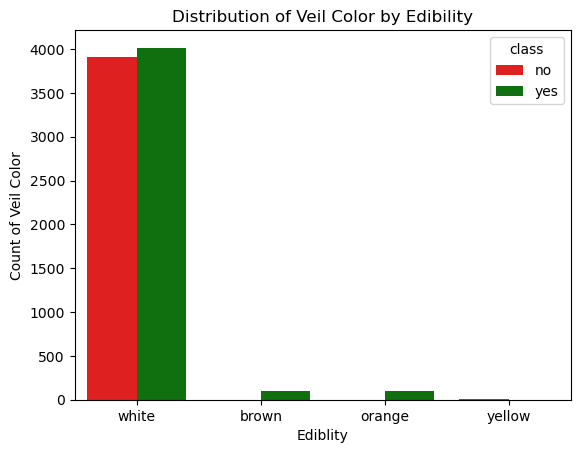

In [36]:
veil_color_names = {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}

labeled_data = df.copy()
labeled_data['veil-color'] = labeled_data['veil-color'].map(veil_color_names)

palette = {'yes': 'green', 'no': 'red'}

sns.countplot(x='veil-color', hue='class', data=labeled_data, palette=palette)   
                                                          
plt.title('Distribution of Veil Color by Edibility')
plt.xlabel('Ediblity')
plt.ylabel('Count of Veil Color')
plt.show()

Data for veil-color are very unbalanced. There are no poisonous mushrooms with brown or organge veil. 
But there are in realitiy for example Cortinarius rubellus with an orange veil. So veil-color has to be handled with care, too.
For possible future data this property will stay in the dataset even though it is very unbalanced.
Other unbalanced properties are gill-attachment and ring-number (plots not shown).

In [37]:
def cramers_v(x, y):
    # Build contingency table of counts for x and y
    ct = pd.crosstab(x, y)
    # Total number of observations
    n = ct.values.sum()
    # Number of rows and columns in the contingency table
    r, k = ct.shape
    # If either variable has fewer than 2 categories, Cramér's V is not defined
    if r < 2 or k < 2:
        return np.nan
    # Compute chi-squared statistic (without Yates' correction)
    chi2 = chi2_contingency(ct, correction=False)[0]
    # Apply formula for Cramér's V
    return np.sqrt(chi2 / (n * min(r-1, k-1)))


def get_top_features(df: pd.DataFrame, target: str, top_n: int = 5) -> list:
    # Compute Cramér's V for each feature against the target
    scores = {
        col: cramers_v(df[col], df[target])
        for col in df.columns if col != target
    }
    # Remove features where Cramér's V could not be computed (NaN)
    scores = {k: v for k, v in scores.items() if not np.isnan(v)}
    # Sort features by descending association strength
    sorted_feats = sorted(scores.items(), key=lambda x: -x[1])
    # Return the top_n feature names
    return [feature for feature, _ in sorted_feats[:top_n]]


def nominal_assoc_matrix(df: pd.DataFrame) -> pd.DataFrame:
    # Get list of all column names
    cols = df.columns
    # Initialize a square matrix with 1s on the diagonal
    M = pd.DataFrame(np.eye(len(cols)), index=cols, columns=cols)
    # Compute Cramér's V for each unique pair of columns
    for c1, c2 in combinations(cols, 2):
        v = cramers_v(df[c1], df[c2])
        # Fill both [c1, c2] and [c2, c1] for symmetry
        M.loc[c1, c2] = M.loc[c2, c1] = v
    return M


In [38]:
# Show full pairwise matrix
V = nominal_assoc_matrix(df)
display(V.style.background_gradient('Blues'))

# Extract top 5 and top 15 features against the target class
top5_features  = get_top_features(df, target='class', top_n=5)
top15_features = get_top_features(df, target='class', top_n=15)

print("Top  5 features according to Cramér’s V:", top5_features)
print("Top 15 features according to Cramér’s V:", top15_features)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.245571,0.196925,0.218427,0.501530,0.971005,0.129200,0.348387,0.540024,0.680830,0.102019,0.406805,0.587944,0.574837,0.524850,0.514725,0.153421,0.214772,0.603271,0.752645,0.487376,0.440136
cap-shape,0.245571,1.000000,0.203721,0.171431,0.255606,0.245516,0.154978,0.081702,0.346823,0.235100,0.307104,0.360155,0.160055,0.112243,0.214668,0.170397,0.224458,0.199408,0.208181,0.250994,0.241279,0.271124
cap-surface,0.196925,0.203721,1.000000,0.225273,0.134377,0.238446,0.210841,0.338222,0.277414,0.257618,0.078770,0.314652,0.144121,0.169393,0.252472,0.257451,0.134370,0.099147,0.224726,0.232623,0.262080,0.251007
cap-color,0.218427,0.171431,0.225273,1.000000,0.217648,0.332026,0.247965,0.399956,0.470307,0.282430,0.595394,0.385320,0.257079,0.320134,0.276539,0.279258,0.150920,0.337731,0.558073,0.286514,0.305809,0.326779
bruises,0.501530,0.255606,0.134377,0.217648,1.000000,0.660906,0.137359,0.299473,0.369596,0.650326,0.099364,0.571235,0.575184,0.566732,0.483226,0.492838,0.133964,0.071122,0.768492,0.612390,0.300576,0.530920
odor,0.971005,0.245516,0.238446,0.332026,0.660906,1.000000,0.261795,0.429768,0.760919,0.390260,0.575843,0.619751,0.416352,0.507273,0.450204,0.446679,0.104691,0.742821,0.696915,0.396389,0.374899,0.370058
gill-attachment,0.129200,0.154978,0.210841,0.247965,0.137359,0.261795,1.000000,0.071489,0.108984,0.780160,0.186485,0.221303,0.094589,0.124696,0.977755,0.977755,0.955097,0.203775,0.250744,0.826898,0.414080,0.436527
gill-spacing,0.348387,0.081702,0.338222,0.399956,0.299473,0.429768,0.071489,1.000000,0.108333,0.325755,0.080895,0.575685,0.437267,0.414870,0.401152,0.375507,0.098653,0.245659,0.290314,0.308599,0.673949,0.542608
gill-size,0.540024,0.346823,0.277414,0.470307,0.369596,0.760919,0.108984,0.108333,1.000000,0.784064,0.214576,0.627578,0.170060,0.150917,0.366078,0.347172,0.113972,0.194983,0.570653,0.660680,0.517812,0.499326
gill-color,0.680830,0.235100,0.257618,0.282430,0.650326,0.390260,0.780160,0.325755,0.784064,1.000000,0.612360,0.515254,0.353863,0.377980,0.420948,0.417087,0.453427,0.444296,0.518523,0.485242,0.424979,0.458522


Top  5 features according to Cramér’s V: ['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring']
Top 15 features according to Cramér’s V: ['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size', 'stalk-color-above-ring', 'stalk-color-below-ring', 'bruises', 'population', 'habitat', 'stalk-root', 'gill-spacing', 'cap-shape']


### 

# 4. Preparing the data

Missing entries, represented by "?" were removed from the dataset.

Afterwards the **categorical** feature values were mapped to numerical codes usind an Encoder. This transformation is necessary because numerical input rather than categorical strings are required.
**One-Hot Encoding** for the feature variables is chosen over alternatives such as Label Encoding because it avoids introducing artificial ordinal relationships between categories and is suitable for our selected models (linear and tree-based). The binary target variable is encoded with a **Label Encoder**.

Since our dataset contains only categorical features (which are one-hot encoded), feature scaling is not necessary.

In [39]:
def prepare_data(df, exclude_features=None, test_size=0.2, random_state=42):
    """Clean the data, drop optional features, encode target, and split into train/test sets."""
    # 1. Handle missing values in 'stalk-root'
    df_clean = df[df['stalk-root'] != '?'].copy()
    if exclude_features:
        df_clean.drop(columns=exclude_features, inplace=True, errors='ignore')
    # 2. Encode target label to 0/1
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df_clean['class'])
    X = df_clean.drop(columns=['class'])
    # 3. Stratified train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    print(f"After dropping missing 'stalk-root': {df_clean.shape[0]} samples remain.")
    print(f"Train/Test split: {X_train.shape[0]} train and {X_test.shape[0]} test samples.")
    return X_train, X_test, y_train, y_test, label_encoder

In [40]:
# Prepare data for full feature set
X_train_all, X_test_all, y_train_all, y_test_all, label_enc_all = prepare_data(df, exclude_features=None)

# Prepare data for reduced feature set (exclude the top 15 predictive features)
X_train_red, X_test_red, y_train_red, y_test_red, label_enc_red = prepare_data(df, exclude_features=top15_features)
print("Excluded features for reduced set:", top15_features)

#Prepare dataset for small feature list, only 10 Features that can easyl be checked by a normal perosn in the forest while collecitng mushrooms
exclude_features_forest = [
    "gill-size",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "spore-print-color",
    "population",
]

X_train_forest, X_test_forest, y_train_forest, y_test_forest, label_enc_forest = \
    prepare_data(df, exclude_features=exclude_features_forest)

After dropping missing 'stalk-root': 5644 samples remain.
Train/Test split: 4515 train and 1129 test samples.
After dropping missing 'stalk-root': 5644 samples remain.
Train/Test split: 4515 train and 1129 test samples.
Excluded features for reduced set: ['odor', 'spore-print-color', 'gill-color', 'ring-type', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size', 'stalk-color-above-ring', 'stalk-color-below-ring', 'bruises', 'population', 'habitat', 'stalk-root', 'gill-spacing', 'cap-shape']
After dropping missing 'stalk-root': 5644 samples remain.
Train/Test split: 4515 train and 1129 test samples.


In [41]:
def preprocess_once(X_tr, X_te):
    cats = X_tr.columns.tolist()
    # 1) One-hot encode
    ohe = ColumnTransformer([
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cats)
    ], remainder='drop')
    X_tr_ohe = ohe.fit_transform(X_tr)
    X_te_ohe = ohe.transform(X_te)

    # 2) Scale (variance normalize) for LogisticRegression
    scaler = StandardScaler(with_mean=False)
    X_tr_scl = scaler.fit_transform(X_tr_ohe)
    X_te_scl = scaler.transform(X_te_ohe)

    return {
        'ohe_tr':  X_tr_ohe,
        'ohe_te':  X_te_ohe,
        'scl_tr':  X_tr_scl,
        'scl_te':  X_te_scl,
        'ohe':     ohe,
        'scaler':  scaler
    }

In [42]:

prep_all = preprocess_once(X_train_all, X_test_all)
prep_red = preprocess_once(X_train_red, X_test_red)
prep_small = preprocess_once(X_train_forest, X_test_forest)

# 5. Selecting and training the model

1. If the data is huge, sample smaller training sets so you can train many different models in a reasonable time. 
2. Try to automate the process as much as possible. 
3. Train many quick models from different categories (e.g., linear, naive Bayes, SVM, Rand. Forests, neural net, etc.) using standard parameters. 
4. Measure and compare performance: For each model, use N-fold cross-validation and compute mean and standard deviation of performance.
5. Analyze the most significant attributes/features for each algorithm. 
6. Analyze the types of errors the models make: What data would a human have used to avoid these errors? 
7. Have a quick round of feature selection and feature engineering. 
8. Have one or two more quick iterations of the five previous steps. 
9. Short-list the top three to five most promising models, preferring models that make different types of errors.


Models relevant for this project: `Logistic Regression`, `XGBoost` and `ThirdModelToBeChosen` (maybe a DecisionTree?)

In [43]:
# Generic Train–Evaluate

def train_and_evaluate(clf, X_tr, y_tr, X_te, y_te):
    n_features = X_tr.shape[1]
    

    clf.fit(X_tr, y_tr)
    y_tr_pred = clf.predict(X_tr)
    y_te_pred = clf.predict(X_te)

    if hasattr(clf, "predict_proba"):
        y_te_prob = clf.predict_proba(X_te)[:, 1]
        auc_str = f"{roc_auc_score(y_te, y_te_prob):.3f}"
    else:
        auc_str = "n/a"

    print(
        f"{clf.__class__.__name__:20} | "
        f"Features = {n_features:4d} | "
        f"Train Acc = {accuracy_score(y_tr, y_tr_pred):.3f} | "
        f"Test Acc  = {accuracy_score(y_te,    y_te_pred):.3f} | "
        f"ROC-AUC    = {auc_str}"
    )
    return clf


### 5.1 XGBoost
Training and testing  the xgboost model

In [ ]:
# XGBoost on FULL, REDUCED, and Tiny on FULL

# Silence the old-use_label_encoder warning
warnings.filterwarnings(
    'ignore',
    category=UserWarning,
    module='xgboost.core'
)

# Baseline models on different feature sets
print("→ XGBoost: FULL baseline")
xgb_full_baseline = XGBClassifier(eval_metric='logloss', random_state=42)
train_and_evaluate(
    xgb_full_baseline,
    prep_all['ohe_tr'], y_train_all,
    prep_all['ohe_te'],  y_test_all
)

print("→ XGBoost: REDUCED baseline")
xgb_red_baseline = XGBClassifier(eval_metric='logloss', random_state=42)
train_and_evaluate(
    xgb_red_baseline,
    prep_red['ohe_tr'], y_train_red,
    prep_red['ohe_te'],  y_test_red
)

print("→ XGBoost: FOREST baseline")
xgb_forest_baseline = XGBClassifier(random_state=42)
train_and_evaluate(
    xgb_forest_baseline,
    prep_small['ohe_tr'], y_train_forest,
    prep_small['ohe_te'],  y_test_forest
)

# Tiny models on FULL and FOREST features
print("→ XGBoost: FULL tiny")
xgb_full_tiny = XGBClassifier(
    n_estimators=5, max_depth=2, learning_rate=0.5,
    eval_metric='logloss', random_state=42
)
train_and_evaluate(
    xgb_full_tiny,
    prep_all['ohe_tr'], y_train_all,
    prep_all['ohe_te'],  y_test_all
)


→ XGBoost: FULL baseline
XGBClassifier        | Features =   97 | Train Acc = 1.000 | Test Acc  = 1.000 | ROC-AUC    = 1.000
→ XGBoost: REDUCED baseline
XGBClassifier        | Features =   21 | Train Acc = 0.875 | Test Acc  = 0.880 | ROC-AUC    = 0.959
→ XGBoost: FULL tiny
XGBClassifier        | Features =   97 | Train Acc = 0.998 | Test Acc  = 0.996 | ROC-AUC    = 1.000
→ XGBoost: FOREST tiny
XGBClassifier        | Features =   53 | Train Acc = 0.984 | Test Acc  = 0.987 | ROC-AUC    = 0.991


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### 5.2 Logistic Regression

In [ ]:
# Logistic Regression on FULL, REDUCED, and Tiny on FULL

# Baseline models on different feature sets
print("→ Logistic Regression: FULL baseline")
lr_full_baseline = LogisticRegression(max_iter=10_000, random_state=42)
train_and_evaluate(
    lr_full_baseline,
    prep_all['scl_tr'], y_train_all,
    prep_all['scl_te'], y_test_all
)

print("→ Logistic Regression: REDUCED baseline")
lr_red_baseline = LogisticRegression(max_iter=10_000, random_state=42)
train_and_evaluate(
    lr_red_baseline,
    prep_red['scl_tr'], y_train_red,
    prep_red['scl_te'], y_test_red
)

print("→ Logistic Regression: FOREST baseline")
lr_forest_baseline = LogisticRegression(random_state=42)
train_and_evaluate(
    lr_forest_baseline,
    prep_small['scl_tr'], y_train_forest,
    prep_small['scl_te'], y_test_forest
)

# Tiny models on FULL and FOREST features
print("→ Logistic Regression: FULL tiny")
lr_full_tiny = LogisticRegression(max_iter=10_000, random_state=42, C=0.001)
train_and_evaluate(
    lr_full_tiny,
    prep_all['scl_tr'], y_train_all,
    prep_all['scl_te'], y_test_all
)

→ Logistic Regression: FULL baseline


LogisticRegression   | Features =   97 | Train Acc = 1.000 | Test Acc  = 1.000 | ROC-AUC    = 1.000
→ Logistic Regression: REDUCED baseline
LogisticRegression   | Features =   21 | Train Acc = 0.828 | Test Acc  = 0.846 | ROC-AUC    = 0.914
→ Logistic Regression: FULL tiny
LogisticRegression   | Features =   97 | Train Acc = 0.999 | Test Acc  = 1.000 | ROC-AUC    = 1.000
→ Logistic Regression: FOREST tiny
LogisticRegression   | Features =   53 | Train Acc = 0.992 | Test Acc  = 0.985 | ROC-AUC    = 0.999


LogisticRegression(C=0.001, max_iter=10000, random_state=42)

### 5.3 Random Forest

In [ ]:
# Random Forest on FULL, REDUCED, and Tiny on FULL

# Baseline models on different feature sets
print("→ Random Forest: FULL baseline")
rf_full_baseline = RandomForestClassifier(random_state=42)
train_and_evaluate(
    rf_full_baseline,
    prep_all['ohe_tr'], y_train_all,
    prep_all['ohe_te'], y_test_all
)

print("→ Random Forest: REDUCED baseline")
rf_red_baseline = RandomForestClassifier(random_state=42)
train_and_evaluate(
    rf_red_baseline,
    prep_red['ohe_tr'], y_train_red,
    prep_red['ohe_te'], y_test_red
)

print("→ Random Forest: FOREST baseline")
rf_forest_baseline = RandomForestClassifier(random_state=42)
train_and_evaluate(
    rf_forest_baseline,
    prep_small['ohe_tr'], y_train_forest,
    prep_small['ohe_te'], y_test_forest
)
# Tiny models on FULL and FOREST features
print("→ Random Forest: FULL tiny")
rf_full_tiny = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=42)
train_and_evaluate(
    rf_full_tiny,
    prep_all['ohe_tr'], y_train_all,
    prep_all['ohe_te'], y_test_all
)




→ Random Forest: FULL baseline
RandomForestClassifier | Features =   97 | Train Acc = 1.000 | Test Acc  = 1.000 | ROC-AUC    = 1.000
→ Random Forest: REDUCED baseline
RandomForestClassifier | Features =   21 | Train Acc = 0.875 | Test Acc  = 0.880 | ROC-AUC    = 0.960
→ Random Forest: FULL tiny
RandomForestClassifier | Features =   97 | Train Acc = 0.913 | Test Acc  = 0.919 | ROC-AUC    = 0.984
→ Random Forest: FOREST tiny
RandomForestClassifier | Features =   53 | Train Acc = 0.945 | Test Acc  = 0.950 | ROC-AUC    = 0.979


RandomForestClassifier(max_depth=2, n_estimators=5, random_state=42)

### 5.4 Model Performance Comparison

In [47]:

def evaluate_and_plot(
    clf,
    X_tr, y_tr,
    X_te, y_te,
    title,
    setting_name='baseline',
    tol=0.02
):
    """
    1) Plots Confusion Matrix & ROC Curve.
    2) Calculates Train/Test Acc + AUC.
    3) Checks for Over/Underfitting.
    4) Returns a pd.Series with metrics.
    """

    # ── 1) Confusion Matrix ─────────────────────────────
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    y_pred_te = clf.predict(X_te)
    disp = ConfusionMatrixDisplay.from_predictions(
        y_te,
        y_pred_te,
        display_labels=['edible','poisonous'],
        cmap=plt.cm.Blues,
        ax=axes[0]
    )
    axes[0].set_title(f"{title} — Confusion Matrix")

    # ── 2) ROC Curve ────────────────────────────────────
    if hasattr(clf, "predict_proba"):
        y_prob_te = clf.predict_proba(X_te)[:, 1]
    else:
        y_prob_te = clf.decision_function(X_te)

    fpr, tpr, _ = roc_curve(y_te, y_prob_te)
    roc_auc_te = auc(fpr, tpr)

    axes[1].plot(fpr, tpr, lw=2)
    axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axes[1].set_title(f"{title} — ROC Curve (AUC = {roc_auc_te:.3f})")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")

    plt.tight_layout()
    plt.show()

    # ── 3) Metrics ───────────────────────────
    acc_tr = accuracy_score(y_tr, clf.predict(X_tr))
    acc_te = accuracy_score(y_te, y_pred_te)

    # für Training‐AUC
    if hasattr(clf, "predict_proba"):
        y_prob_tr = clf.predict_proba(X_tr)[:, 1]
    else:
        y_prob_tr = clf.decision_function(X_tr)
    roc_auc_tr = roc_auc_score(y_tr, y_prob_tr)

    # ── 4) Over/Underfitting check ─────────────────────
    delta_acc = acc_tr - acc_te
    delta_auc = roc_auc_tr - roc_auc_te

    if delta_acc > tol and delta_auc > tol:
        fit_msg = "Overfitting detected"
    elif delta_acc < -tol and delta_auc < -tol:
        fit_msg = "Potential underfitting"
    else:
        fit_msg = " No strong over/underfitting"

    # ── 5) Output ──────────────────────────────
    print(f"\n→ {title} ({setting_name}):")
    print(f"   TrainAcc = {acc_tr:.3f}, TestAcc = {acc_te:.3f}  "
          f"(Δ = {delta_acc:+.3f} ← TrainAcc - TestAcc)")
    print(f"   TrainAUC = {roc_auc_tr:.3f}, TestAUC = {roc_auc_te:.3f}  "
          f"(Δ = {delta_auc:+.3f} ← TrainAUC - TestAUC)")
    print(f"   {fit_msg}\n")
    print(f"/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")


    # ── 6) Return ─────────
    return pd.Series({
        ('TrainAcc', setting_name): acc_tr,
        ('TestAcc',  setting_name): acc_te,
        ('TrainAUC', setting_name): roc_auc_tr,
        ('TestAUC',  setting_name): roc_auc_te
    }, name=title)


--- FULL FEATURES ---


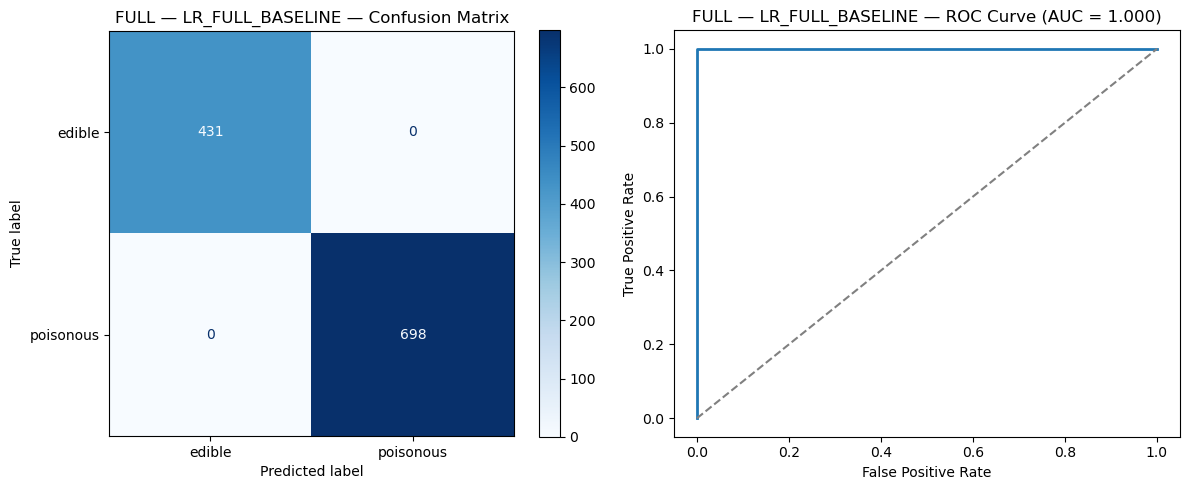


→ FULL — LR_FULL_BASELINE (BASELINE):
   TrainAcc = 1.000, TestAcc = 1.000  (Δ = +0.000 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


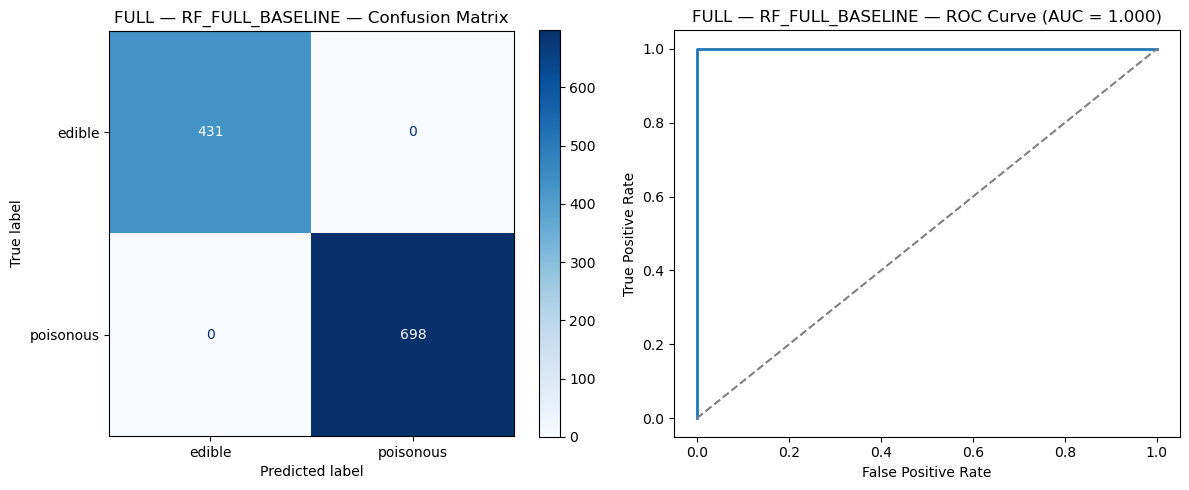


→ FULL — RF_FULL_BASELINE (BASELINE):
   TrainAcc = 1.000, TestAcc = 1.000  (Δ = +0.000 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


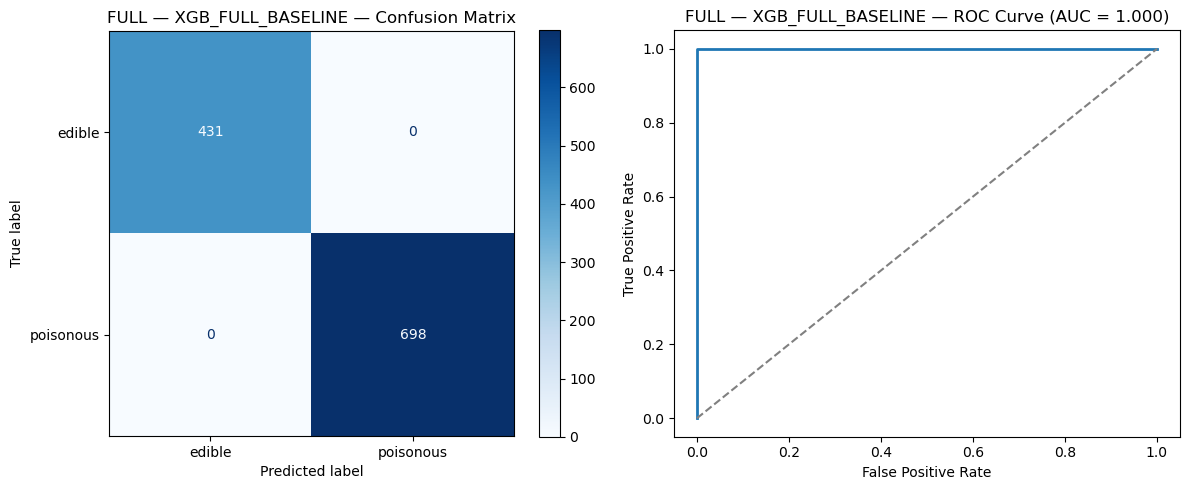


→ FULL — XGB_FULL_BASELINE (BASELINE):
   TrainAcc = 1.000, TestAcc = 1.000  (Δ = +0.000 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


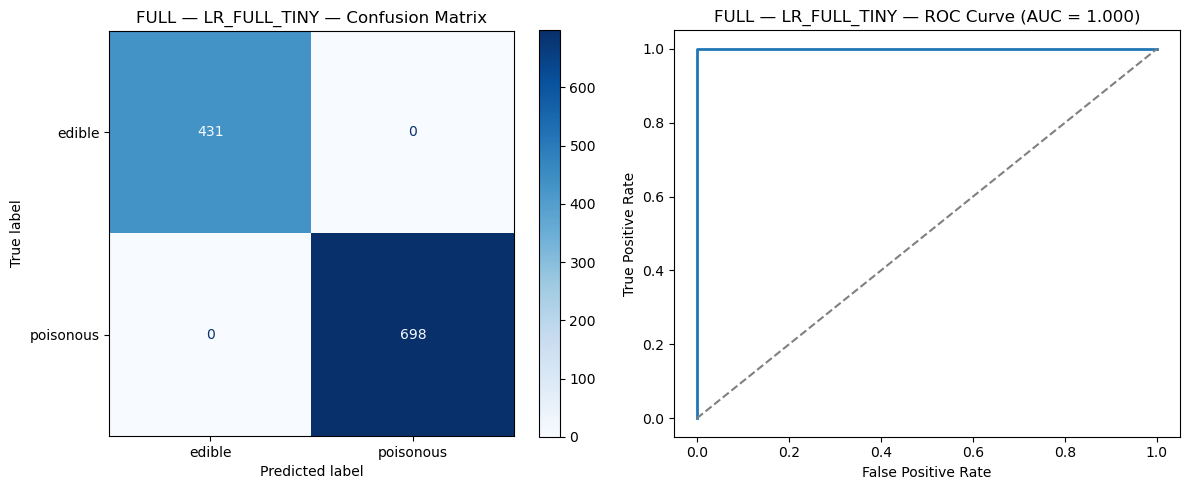


→ FULL — LR_FULL_TINY (TINY):
   TrainAcc = 0.999, TestAcc = 1.000  (Δ = -0.001 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = -0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


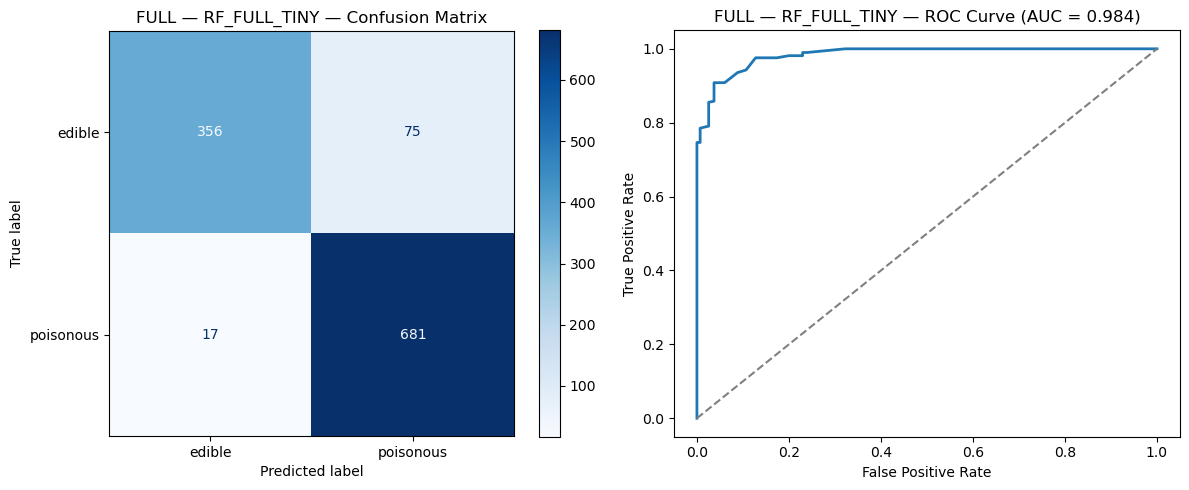


→ FULL — RF_FULL_TINY (TINY):
   TrainAcc = 0.913, TestAcc = 0.919  (Δ = -0.005 ← TrainAcc - TestAcc)
   TrainAUC = 0.987, TestAUC = 0.984  (Δ = +0.003 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


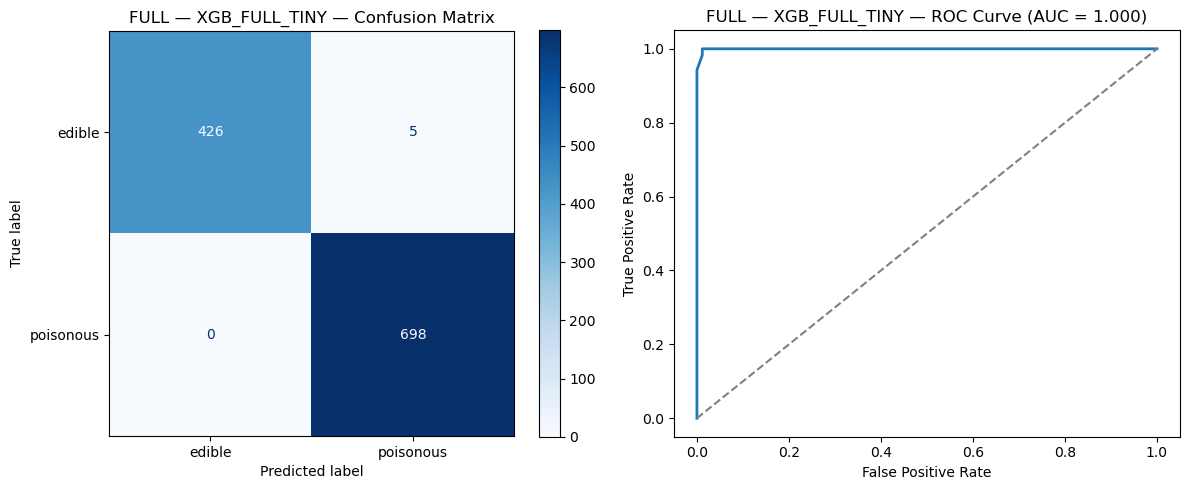


→ FULL — XGB_FULL_TINY (TINY):
   TrainAcc = 0.998, TestAcc = 0.996  (Δ = +0.002 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

--- REDUCED FEATURES ---


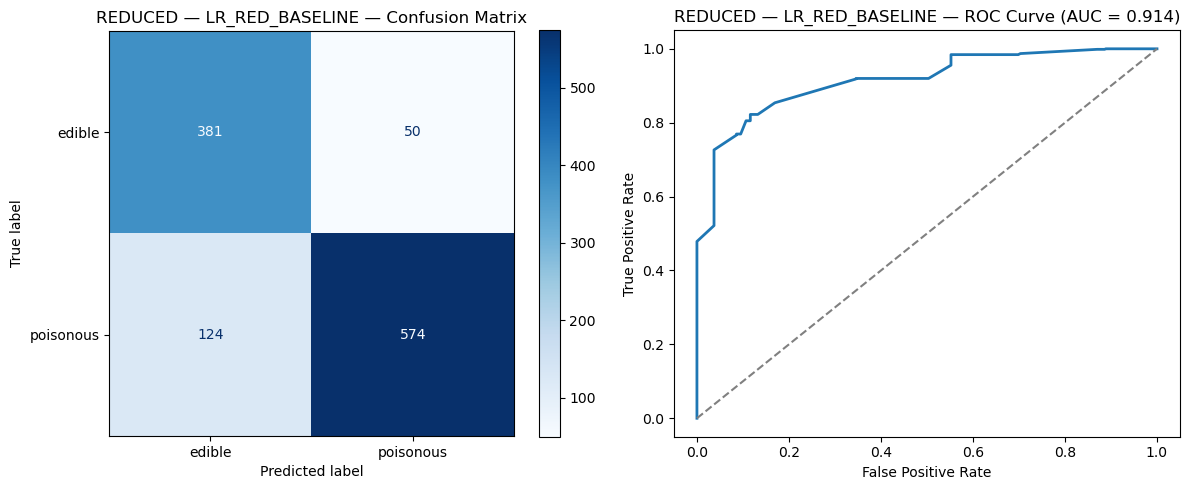


→ REDUCED — LR_RED_BASELINE (BASELINE):
   TrainAcc = 0.828, TestAcc = 0.846  (Δ = -0.018 ← TrainAcc - TestAcc)
   TrainAUC = 0.902, TestAUC = 0.914  (Δ = -0.013 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


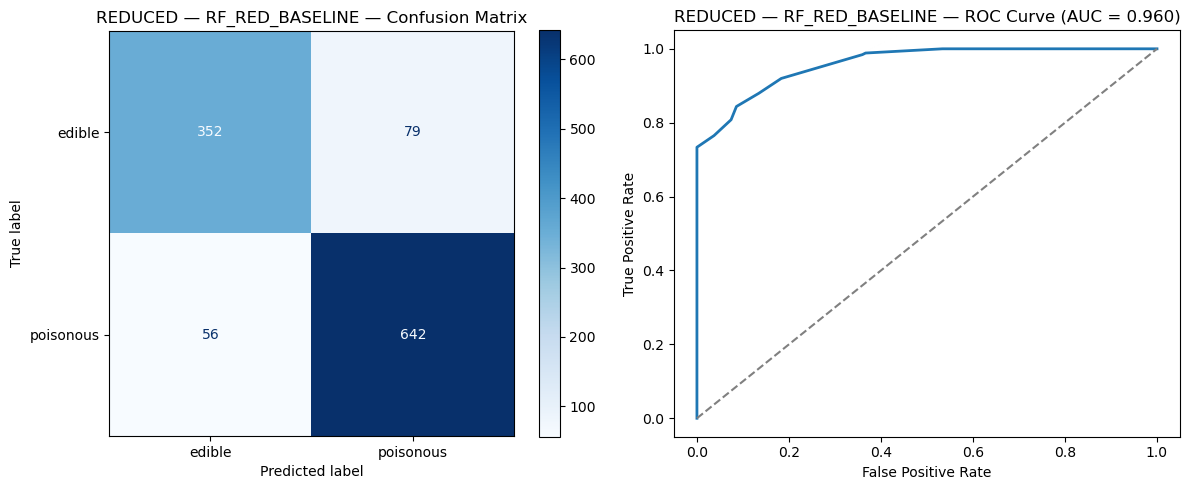


→ REDUCED — RF_RED_BASELINE (BASELINE):
   TrainAcc = 0.875, TestAcc = 0.880  (Δ = -0.006 ← TrainAcc - TestAcc)
   TrainAUC = 0.959, TestAUC = 0.960  (Δ = -0.001 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


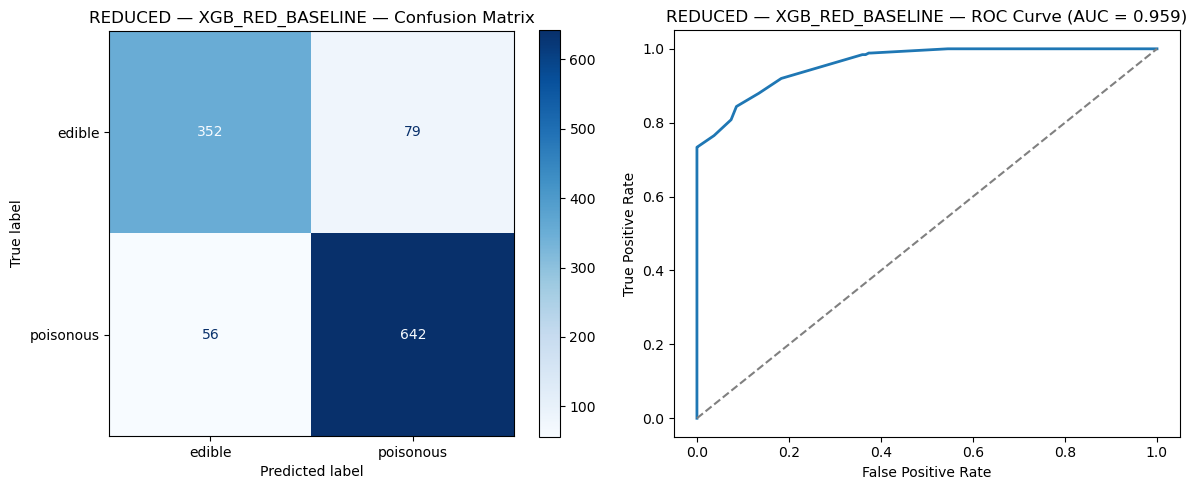


→ REDUCED — XGB_RED_BASELINE (BASELINE):
   TrainAcc = 0.875, TestAcc = 0.880  (Δ = -0.006 ← TrainAcc - TestAcc)
   TrainAUC = 0.959, TestAUC = 0.959  (Δ = -0.001 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

--- FOREST FEATURES ---


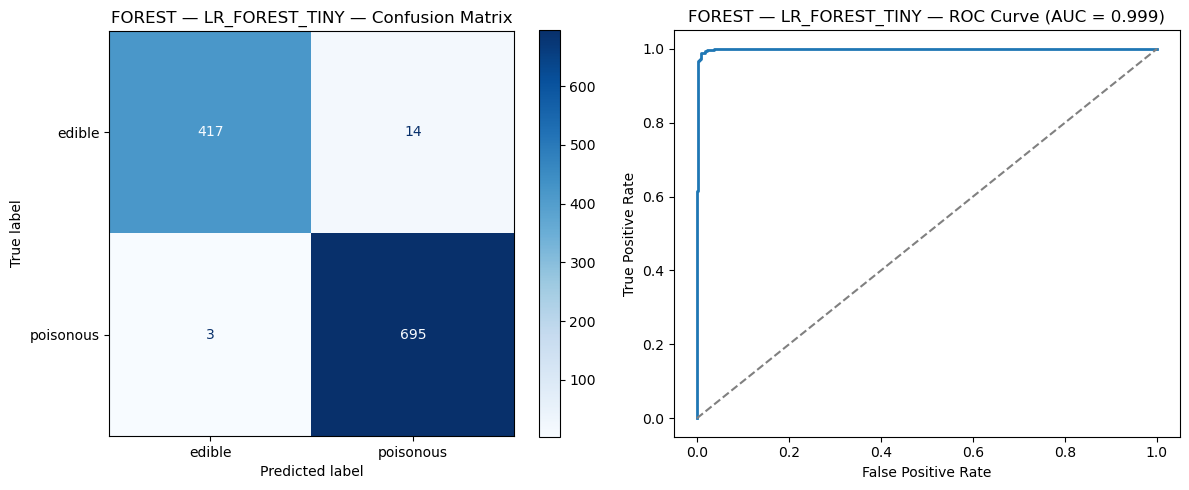


→ FOREST — LR_FOREST_TINY (TINY):
   TrainAcc = 0.992, TestAcc = 0.985  (Δ = +0.007 ← TrainAcc - TestAcc)
   TrainAUC = 0.999, TestAUC = 0.999  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


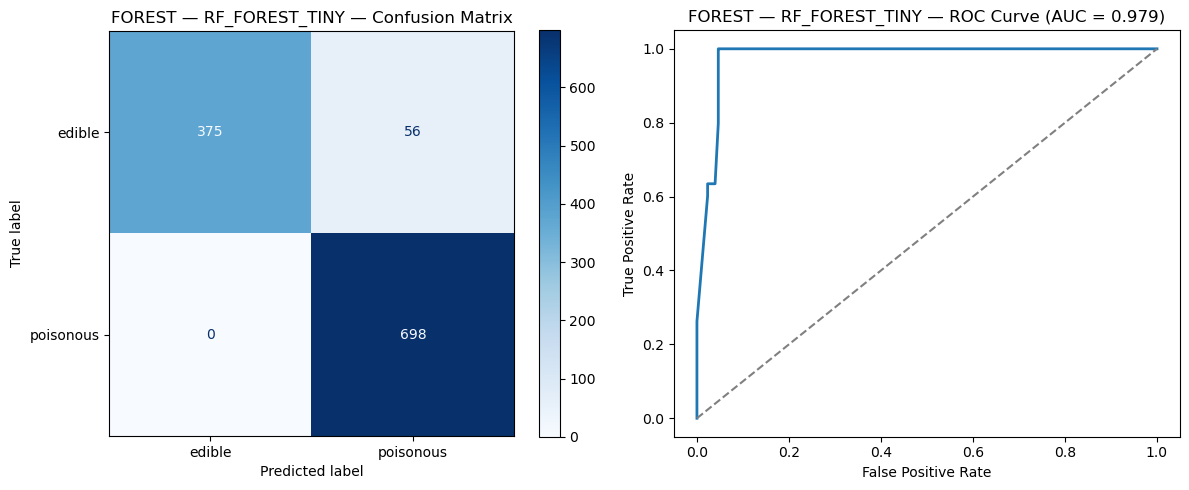


→ FOREST — RF_FOREST_TINY (TINY):
   TrainAcc = 0.945, TestAcc = 0.950  (Δ = -0.005 ← TrainAcc - TestAcc)
   TrainAUC = 0.979, TestAUC = 0.979  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


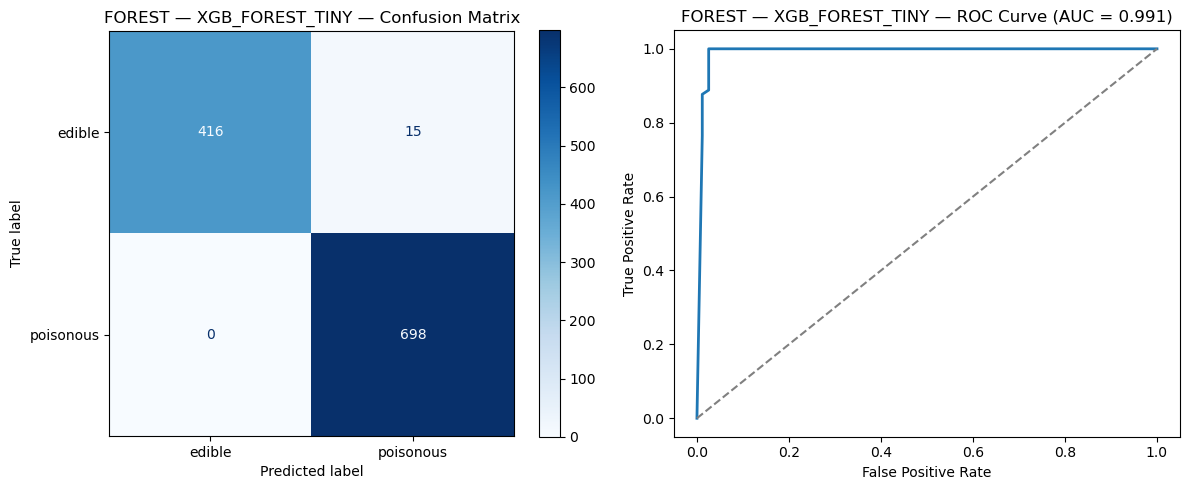


→ FOREST — XGB_FOREST_TINY (TINY):
   TrainAcc = 0.984, TestAcc = 0.987  (Δ = -0.003 ← TrainAcc - TestAcc)
   TrainAUC = 0.994, TestAUC = 0.991  (Δ = +0.003 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [ ]:

# FULL FEATURES
print("\n--- FULL FEATURES ---")
for name, clf, key, setting in [
    ('LR_FULL_BASELINE',    lr_full_baseline,   'scl_te', 'BASELINE'),
    ('RF_FULL_BASELINE',    rf_full_baseline,   'ohe_te', 'BASELINE'),
    ('XGB_FULL_BASELINE',   xgb_full_baseline,  'ohe_te', 'BASELINE'),
    ('LR_FULL_TINY',        lr_full_tiny,       'scl_te', 'TINY'),
    ('RF_FULL_TINY',        rf_full_tiny,       'ohe_te', 'TINY'),
    ('XGB_FULL_TINY',       xgb_full_tiny,      'ohe_te', 'TINY'),
]:
    X_te = prep_all[key]
    if key == 'scl_te':
        X_tr, y_tr = prep_all['scl_tr'], y_train_all
    else:
        X_tr, y_tr = prep_all['ohe_tr'], y_train_all

    evaluate_and_plot(
        clf, X_tr, y_tr,
        X_te, y_test_all,
        title=f"FULL — {name}",
        setting_name=setting
    )

# REDUCED FEATURES
print("\n--- REDUCED FEATURES ---")
for name, clf, key in [
    ('LR_RED_BASELINE',   lr_red_baseline, 'scl_te'),
    ('RF_RED_BASELINE',   rf_red_baseline, 'ohe_te'),
    ('XGB_RED_BASELINE',  xgb_red_baseline,'ohe_te'),
]:
    X_te = prep_red[key]
    if key == 'scl_te':
        X_tr, y_tr = prep_red['scl_tr'], y_train_red
    else:
        X_tr, y_tr = prep_red['ohe_tr'], y_train_red

    evaluate_and_plot(
        clf, X_tr, y_tr,
        X_te, y_test_red,
        title=f"REDUCED — {name}",
        setting_name='BASELINE'
    )

# FOREST FEATURES 
print("\n--- FOREST FEATURES ---")
for name, clf, key in [
    ('LR_FOREST_BASELINE',  lr_forest_baseline,  'scl_te'),
    ('RF_FOREST_BASELINE',  rf_forest_baseline,  'ohe_te'),
    ('XGB_FOREST_BASELINE', xgb_forest_baseline, 'ohe_te'),
]:
    X_te = prep_small[key]
    if key == 'scl_te':
        X_tr, y_tr = prep_small['scl_tr'], y_train_forest
    else:
        X_tr, y_tr = prep_small['ohe_tr'], y_train_forest

    evaluate_and_plot(
        clf,
        X_tr, y_tr,
        X_te, y_test_forest,
        title=f"FOREST — {name}",
        setting_name='BASELINE'
    )

### 5.5 (?) Error Analysis

The confusion matrix reveals that the Random Forest model achieves nearly perfect classification on the test set. Only very few misclassifications occur. Given the structure of the dataset (purely categorical, with some highly predictive features like `odor` and `spore-print-color`), this result is expected.

If a human were to classify mushrooms, they would likely rely on features like **odor, bruises, and gill characteristics**, which align with the model's most important features. Therefore, the model's decision process appears to be interpretable and biologically plausible.



# 6. Fine-tuning the model

General guidelines: 
1. Use as much data as possible for this step. 
2. As always automate what you can. 
3. Fine-tune the hyperparameters using cross-validation. 
4. Treat your data transformation choices as hyperparameters (e.g. replace missing values with zero or median? Or just drop the rows?). 
5. Unless there are very few hyperparamter values to explore, prefer random search over grid search. 
6. Try Ensemble methods. Combining your best models will often perform better than running them invdividually. 
7. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.
8. Don't tweak your model after measuring the generalization error: you would just start overfitting the test set

In [ ]:
# Parameter search-spaces for RandomizedSearchCV

# Logistic Regression Tiny
# Note: C is the inverse of regularization strength; smaller values specify stronger regularization.
""" param_dist_lr = {
    'C': st.loguniform(1e-3, 10)
} """


# Logistic Regression Tiny
param_dist_lr = {
    'penalty'  : ['l1', 'l2', 'elasticnet'],
    'C'        : st.loguniform(1e-4, 10),
    'solver'   : ['liblinear', 'saga'],
    'tol'      : st.loguniform(1e-6, 1e-2),
}



# Random Forest Tiny
param_dist_rf = {
    'n_estimators': st.randint(5, 100),
    'max_depth'   : st.randint(2, 10)
}


# Define search space for tiny XGBoost
param_dist_xgb = {
    'n_estimators'     : st.randint(5, 100),
    'max_depth'        : st.randint(2, 10),
    'learning_rate'    : st.loguniform(1e-3, 1.0),
    'subsample'        : uniform(loc=0.5, scale=0.5),
    'colsample_bytree' : uniform(loc=0.5, scale=0.5),
}



In [50]:
# Logistic Regression Tiny Hyperparameter Tuning (Full & Forest)

# Full dataset tuning
print("→ LR_FULL_TUNED")
rs_LR_FULL_TUNED = RandomizedSearchCV(
    LogisticRegression(max_iter=10_000, random_state=42),
    param_dist_lr,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
rs_LR_FULL_TUNED.fit(prep_all['scl_tr'], y_train_all)
LR_FULL_TUNED = rs_LR_FULL_TUNED.best_estimator_
print("LR_FULL_TUNED params:", rs_LR_FULL_TUNED.best_params_,
      "CV AUC:", rs_LR_FULL_TUNED.best_score_)

# Forest dataset tuning
print("\n→ LR_FOREST_TUNED")
rs_LR_FOREST_TUNED = RandomizedSearchCV(
    LogisticRegression(max_iter=10_000, random_state=42),
    param_dist_lr,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)
rs_LR_FOREST_TUNED.fit(prep_small['scl_tr'], y_train_forest)
LR_FOREST_TUNED = rs_LR_FOREST_TUNED.best_estimator_
print("LR_FOREST_TUNED params:", rs_LR_FOREST_TUNED.best_params_,
      "CV AUC:", rs_LR_FOREST_TUNED.best_score_)

→ LR_FULL_TUNED
LR_FULL_TUNED params: {'C': np.float64(0.0074593432857265485), 'penalty': 'l1', 'solver': 'liblinear', 'tol': np.float64(0.0008471801418819979)} CV AUC: 1.0

→ LR_FOREST_TUNED


/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LR_FOREST_TUNED params: {'C': np.float64(0.20540519425388448), 'penalty': 'l2', 'solver': 'saga', 'tol': np.float64(0.00012030178871154674)} CV AUC: 1.0


In [51]:
# Random Forest Tiny Hyperparameter Tuning (Full & Forest)

# Full dataset tuning
print("→ RF_FULL_TUNED")
rs_RF_FULL_TUNED = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist_rf,
    n_iter=20, cv=5,
    scoring='roc_auc', n_jobs=-1,
    random_state=42
)
rs_RF_FULL_TUNED.fit(prep_all['ohe_tr'], y_train_all)
RF_FULL_TUNED = rs_RF_FULL_TUNED.best_estimator_
print("RF_FULL_TUNED params:", rs_RF_FULL_TUNED.best_params_,
      "CV AUC:", rs_RF_FULL_TUNED.best_score_)

# Forest dataset tuning
print("\n→ RF_FOREST_TUNED")
rs_RF_FOREST_TUNED = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist_rf,
    n_iter=20, cv=5,
    scoring='roc_auc', n_jobs=-1,
    random_state=42
)
rs_RF_FOREST_TUNED.fit(prep_small['ohe_tr'], y_train_forest)
RF_FOREST_TUNED = rs_RF_FOREST_TUNED.best_estimator_
print("RF_FOREST_TUNED params:", rs_RF_FOREST_TUNED.best_params_,
      "CV AUC:", rs_RF_FOREST_TUNED.best_score_)


→ RF_FULL_TUNED
RF_FULL_TUNED params: {'max_depth': 8, 'n_estimators': 56} CV AUC: 1.0

→ RF_FOREST_TUNED
RF_FOREST_TUNED params: {'max_depth': 8, 'n_estimators': 56} CV AUC: 1.0


In [52]:
# XGBoost Tiny Hyperparameter Tuning (Full & Forest)

# Full dataset tuning
print("→ XGB_FULL_TUNED")
rs_XGB_FULL_TUNED = RandomizedSearchCV(
    XGBClassifier(eval_metric='auc', use_label_encoder=False, random_state=42),
    param_dist_xgb,
    n_iter=20, cv=5,
    scoring='roc_auc', n_jobs=-1,
    random_state=42
)
rs_XGB_FULL_TUNED.fit(prep_all['ohe_tr'], y_train_all)
XGB_FULL_TUNED = rs_XGB_FULL_TUNED.best_estimator_
print("XGB_FULL_TUNED params:", rs_XGB_FULL_TUNED.best_params_,
      "CV AUC:", rs_XGB_FULL_TUNED.best_score_)

# Forest dataset tuning
print("\n→ XGB_FOREST_TUNED")
rs_XGB_FOREST_TUNED = RandomizedSearchCV(
    XGBClassifier(eval_metric='auc', use_label_encoder=False, random_state=42),
    param_dist_xgb,
    n_iter=20, cv=5,
    scoring='roc_auc', n_jobs=-1,
    random_state=42
)
rs_XGB_FOREST_TUNED.fit(prep_small['ohe_tr'], y_train_forest)
XGB_FOREST_TUNED = rs_XGB_FOREST_TUNED.best_estimator_
print("XGB_FOREST_TUNED params:", rs_XGB_FOREST_TUNED.best_params_,
      "CV AUC:", rs_XGB_FOREST_TUNED.best_score_)


→ XGB_FULL_TUNED


/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:43:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:43:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:43:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:43:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packag

XGB_FULL_TUNED params: {'colsample_bytree': np.float64(0.6872700594236812), 'learning_rate': np.float64(0.711447600934342), 'max_depth': 4, 'n_estimators': 76, 'subsample': np.float64(0.7993292420985183)} CV AUC: 1.0

→ XGB_FOREST_TUNED


/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:43:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:43:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:43:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:43:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/parallels/miniconda3/envs/ML/lib/python3.9/site-packag

XGB_FOREST_TUNED params: {'colsample_bytree': np.float64(0.6872700594236812), 'learning_rate': np.float64(0.711447600934342), 'max_depth': 4, 'n_estimators': 76, 'subsample': np.float64(0.7993292420985183)} CV AUC: 1.0


Evalution


→ Evaluation of Tuned Tiny Models on FULL Dataset:


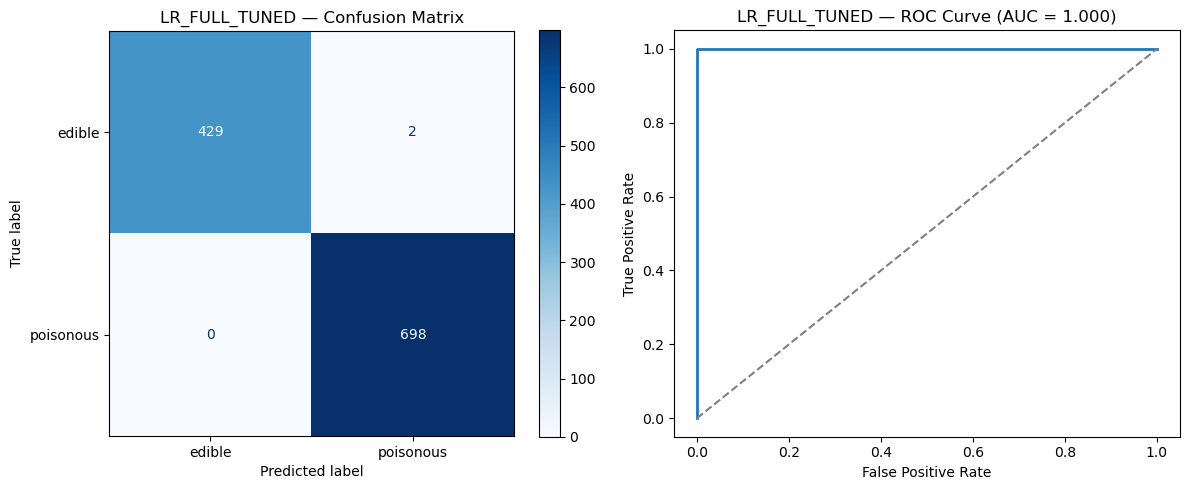


→ LR_FULL_TUNED (TUNED):
   TrainAcc = 0.999, TestAcc = 0.998  (Δ = +0.000 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


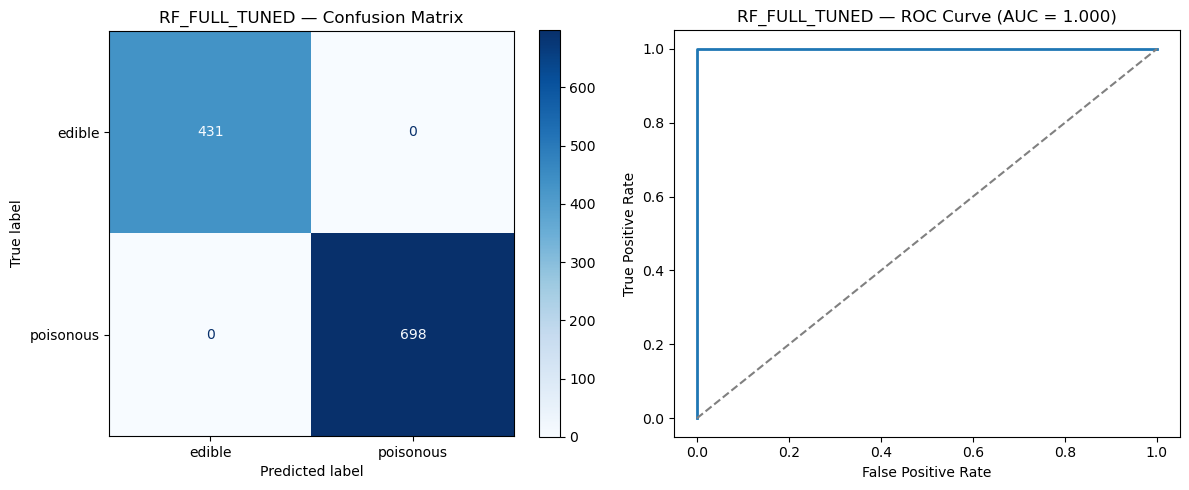


→ RF_FULL_TUNED (TUNED):
   TrainAcc = 1.000, TestAcc = 1.000  (Δ = +0.000 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


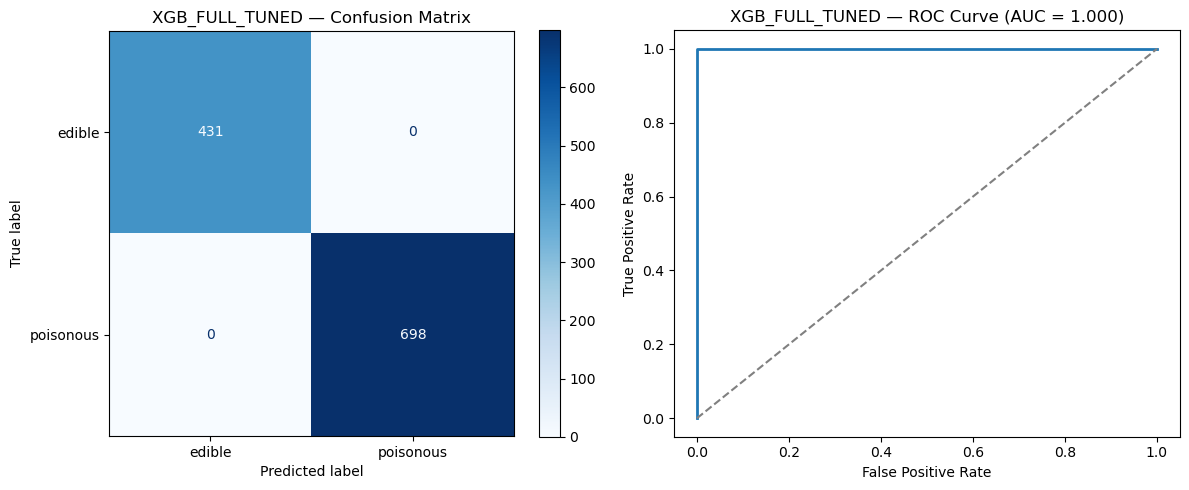


→ XGB_FULL_TUNED (TUNED):
   TrainAcc = 1.000, TestAcc = 1.000  (Δ = +0.000 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

→ Evaluation of Tuned Tiny Models on FOREST Dataset:


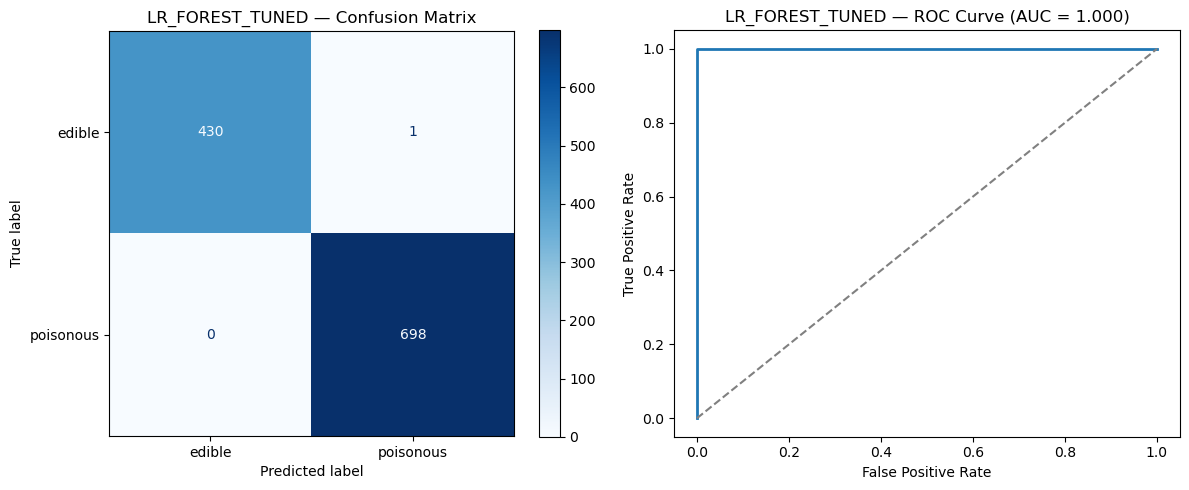


→ LR_FOREST_TUNED (TUNED):
   TrainAcc = 1.000, TestAcc = 0.999  (Δ = +0.000 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


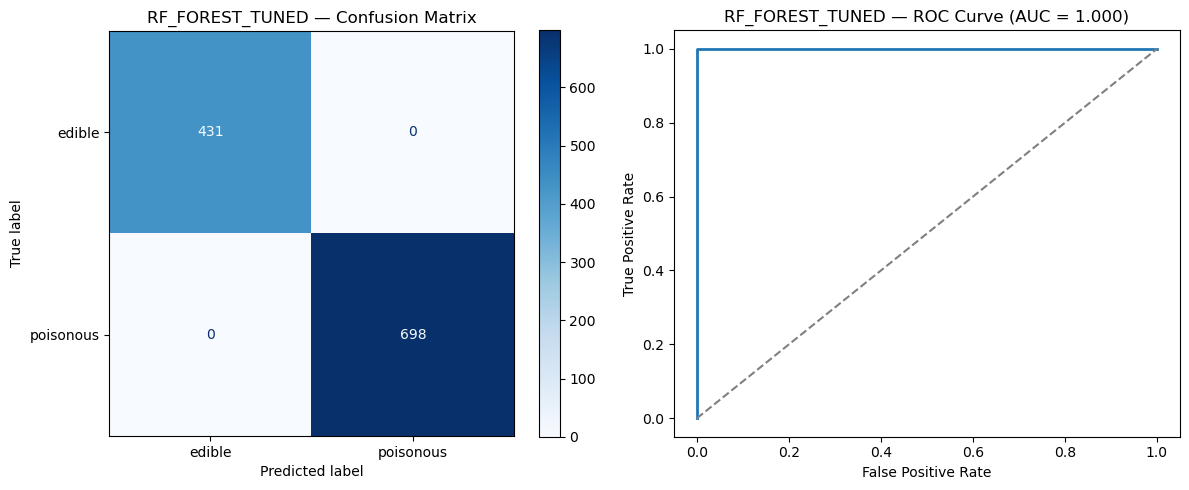


→ RF_FOREST_TUNED (TUNED):
   TrainAcc = 1.000, TestAcc = 1.000  (Δ = -0.000 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


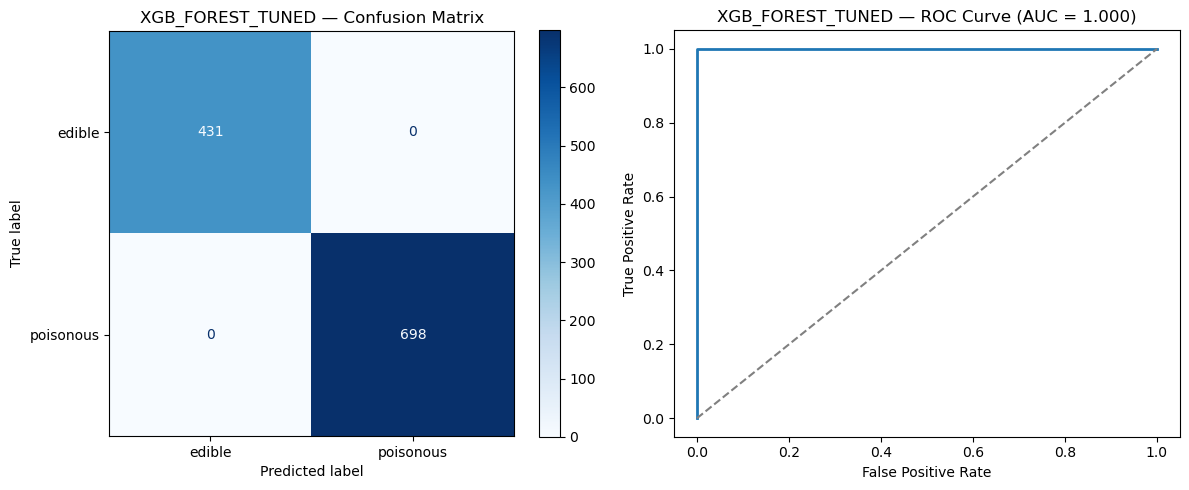


→ XGB_FOREST_TUNED (TUNED):
   TrainAcc = 1.000, TestAcc = 1.000  (Δ = +0.000 ← TrainAcc - TestAcc)
   TrainAUC = 1.000, TestAUC = 1.000  (Δ = +0.000 ← TrainAUC - TestAUC)
    No strong over/underfitting

/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [53]:
# Evaluation of Tuned Tiny Models on FULL Dataset
best_lr_full_tuned   = rs_LR_FULL_TUNED.best_estimator_
best_rf_full_tuned   = rs_RF_FULL_TUNED.best_estimator_
best_xgb_full_tuned  = rs_XGB_FULL_TUNED.best_estimator_

print("\n→ Evaluation of Tuned Tiny Models on FULL Dataset:")
for name, clf, X_te, y_te in [
    ('LR_FULL_TUNED',   best_lr_full_tuned,  prep_all['scl_te'],  y_test_all),
    ('RF_FULL_TUNED',   best_rf_full_tuned,  prep_all['ohe_te'],  y_test_all),
    ('XGB_FULL_TUNED',  best_xgb_full_tuned, prep_all['ohe_te'],  y_test_all),
]:
    if name.startswith('LR'):
        X_tr, y_tr = prep_all['scl_tr'], y_train_all
    else:
        X_tr, y_tr = prep_all['ohe_tr'], y_train_all

    evaluate_and_plot(
        clf,
        X_tr, y_tr,
        X_te, y_te,
        title=name,
        setting_name='TUNED'
    )

# Evaluation of Tuned Tiny Models on FOREST Dataset
best_lr_forest_tuned   = rs_LR_FOREST_TUNED.best_estimator_
best_rf_forest_tuned   = rs_RF_FOREST_TUNED.best_estimator_
best_xgb_forest_tuned  = rs_XGB_FOREST_TUNED.best_estimator_

print("\n→ Evaluation of Tuned Tiny Models on FOREST Dataset:")
for name, clf, X_te, y_te in [
    ('LR_FOREST_TUNED',   best_lr_forest_tuned,  prep_small['scl_te'],  y_test_forest),
    ('RF_FOREST_TUNED',   best_rf_forest_tuned,  prep_small['ohe_te'],  y_test_forest),
    ('XGB_FOREST_TUNED',  best_xgb_forest_tuned, prep_small['ohe_te'],  y_test_forest),
]:
    if name.startswith('LR'):
        X_tr, y_tr = prep_small['scl_tr'], y_train_forest
    else:
        X_tr, y_tr = prep_small['ohe_tr'], y_train_forest

    evaluate_and_plot(
        clf,
        X_tr, y_tr,
        X_te, y_te,
        title=name,
        setting_name='TUNED'
    )


## Persisting Final Pipelines for Deployment

We serialize each end-to-end pipeline (preprocessing + tuned classifier) so that our Streamlit app can load them instantly—no retraining required:

- **Full dataset pipelines** (22 features):
  - `Models/pipeline_lr_full_tuned.pkl`  
  - `Models/pipeline_rf_full_tuned.pkl`  
  - `Models/pipeline_xgb_full_tuned.pkl`  

- **Forest dataset pipelines** (10 “forager-friendly” features):
  - `Models/pipeline_lr_forest_tuned.pkl`  
  - `Models/pipeline_rf_forest_tuned.pkl`  
  - `Models/pipeline_xgb_forest_tuned.pkl`  

Each pickle includes:
1. **One-hot encoder** (and **StandardScaler** for LR)  
2. The **best-estimator** with optimized hyperparameters  

> **Why pickle these pipelines?**  
> - **Fast startup**: load models in milliseconds  
> - **Reproducibility**: exact same preprocessing + parameters each run  
> - **Deployment-ready**: plug into a web-app without code modifications


In [54]:

# Create directory for saving pipelines
os.makedirs('Models', exist_ok=True)

# ─── FULL DATASET: Hyperparameter-tuned pipelines ────────────────────────────
pipe_lr_full_tuned = Pipeline([
    ("ohe",    prep_all['ohe']),
    ("scaler", prep_all['scaler']),
    ("clf",    best_lr_full_tuned)
])
with open('Models/pipeline_lr_full_tuned.pkl', 'wb') as f:
    pickle.dump(pipe_lr_full_tuned, f)

pipe_rf_full_tuned = Pipeline([
    ("ohe", prep_all['ohe']),
    ("clf", best_rf_full_tuned)
])
with open('Models/pipeline_rf_full_tuned.pkl', 'wb') as f:
    pickle.dump(pipe_rf_full_tuned, f)

pipe_xgb_full_tuned = Pipeline([
    ("ohe", prep_all['ohe']),
    ("clf", best_xgb_full_tuned)
])
with open('Models/pipeline_xgb_full_tuned.pkl', 'wb') as f:
    pickle.dump(pipe_xgb_full_tuned, f)


# ─── FOREST DATASET: Hyperparameter-tuned pipelines ──────────────────────────
pipe_lr_forest_tuned = Pipeline([
    ("ohe",    prep_small['ohe']),
    ("scaler", prep_small['scaler']),
    ("clf",    best_lr_forest_tuned)
])
with open('Models/pipeline_lr_forest_tuned.pkl', 'wb') as f:
    pickle.dump(pipe_lr_forest_tuned, f)

pipe_rf_forest_tuned = Pipeline([
    ("ohe", prep_small['ohe']),
    ("clf", best_rf_forest_tuned)
])
with open('Models/pipeline_rf_forest_tuned.pkl', 'wb') as f:
    pickle.dump(pipe_rf_forest_tuned, f)

pipe_xgb_forest_tuned = Pipeline([
    ("ohe", prep_small['ohe']),
    ("clf", best_xgb_forest_tuned)
])
with open('Models/pipeline_xgb_forest_tuned.pkl', 'wb') as f:
    pickle.dump(pipe_xgb_forest_tuned, f)

## Summary of Trained Models and Key Findings

We trained three families of classifiers on three feature sets (Full, Reduced, Forest):

1. **Logistic Regression**  
   - **Baseline**: default `C=1.0`, no feature selection  
   - **Tiny**: strong regularization (`C=0.001`)  
   - **Tuned**: hyperparameters (`penalty`, `C`, `solver`, `tol`) selected via randomized search  

2. **Random Forest**  
   - **Baseline**: 100 trees, no depth limit  
   - **Tiny**: 5 trees, max depth = 2  
   - **Tuned**: number of trees and tree depth optimized  

3. **XGBoost**  
   - **Baseline**: 100 boosting rounds, default learning rate  
   - **Tiny**: 5 rounds, max depth = 2, learning rate = 0.5  
   - **Tuned**: all key parameters (`n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`) randomized  

### Results Overview

| Model Family        | Feature Set | Train Acc | Test Acc | Test AUC |
|---------------------|-------------|-----------|----------|----------|
| Logistic Regression | Full        | 1.000     | 1.000    | 1.000    |
|                     | Reduced     | 0.828     | 0.846    | 0.914    |
|                     | Forest (10) | 0.992     | 0.985    | 0.999    |
| Random Forest       | Full        | 1.000     | 1.000    | 1.000    |
|                     | Reduced     | 0.875     | 0.880    | 0.960    |
|                     | Forest (10) | 0.945     | 0.950    | 0.979    |
| XGBoost             | Full        | 1.000     | 1.000    | 1.000    |
|                     | Reduced     | 0.875     | 0.880    | 0.959    |
|                     | Forest (10) | 0.984     | 0.987    | 0.991    |

- **Full feature models** achieve perfect accuracy and AUC, driven by highly predictive categorical features (e.g. odor, ring-type).  
- Because such perfect scores made us uneasy (risk of overfitting), we also evaluated on the **Reduced** 15-feature set to verify that our approach truly generalizes. Even there, accuracy remained around **88 %**, confirming the robustness of the method.  
- **Forest feature models** (10 easily observable traits) achieve **>98 % accuracy** with even the tiny classifiers.  

### Why the “Forest” (10-feature) Models Succeed

- The **Forest** subset was hand-selected to include only 10 features that a forager could realistically observe in the field.  
- Even **tiny** versions of each algorithm (e.g. 5-tree Random Forest, 5-round XGBoost, heavily regularized LR) achieve **>98 % test accuracy**.  
- This confirms that a **simple, lightweight model**—trained on a small, interpretable feature set—can still distinguish edible from poisonous mushrooms with very high reliability.  

> **Conclusion:** Our approach shows that you don’t need a massive, complex model or the full 22-column dataset to build an effective mushroom classifier. By focusing on a handful of key traits and using compact “tiny” models, we preserve interpretability, minimize resource usage, and still maintain near-perfect performance.



In [56]:

# ─── Display settings ───────────────────────────────────────────────────────
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# ─── Logistic Regression metrics ────────────────────────────────────────────
def make_lr_metrics_df(models, Xtr, ytr, Xte, yte):
    rows = []
    for name, clf in models.items():
        ds = 'FULL' if 'FULL' in name else ('RED' if 'RED' in name else 'FOREST')
        X_train, y_train = Xtr[ds], ytr[ds]
        X_test,  y_test  = Xte[ds], yte[ds]
        params = clf.get_params()
        rows.append({
            'Model':    name,
            'penalty':  params['penalty'],
            'C':        params['C'],
            'solver':   params['solver'],
            'tol':      params['tol'],
            'max_iter': params['max_iter'],
            'TrainAcc': accuracy_score(y_train, clf.predict(X_train)),
            'TestAcc':  accuracy_score(y_test,  clf.predict(X_test)),
        })
    return pd.DataFrame(rows)

In [57]:
# ─── Random Forest metrics ─────────────────────────────────────────────────
def make_rf_metrics_df(models, Xtr, ytr, Xte, yte):
    rows = []
    for name, clf in models.items():
        # Dataset-Auswahl
        ds = 'FULL' if 'FULL' in name else ('RED' if 'RED' in name else 'FOREST')
        X_train, y_train = Xtr[ds], ytr[ds]
        X_test,  y_test  = Xte[ds], yte[ds]

        params = clf.get_params()
 
        if params['max_depth'] is None:

            actual_depth = max(tree.tree_.max_depth for tree in clf.estimators_)
        else:
            actual_depth = params['max_depth']

        rows.append({
            'Model':        name,
            'n_estimators': params['n_estimators'],
            'max_depth':    actual_depth,
            'criterion':    params['criterion'],
            'max_features': params['max_features'],
            'TrainAcc':     accuracy_score(y_train, clf.predict(X_train)),
            'TestAcc':      accuracy_score(y_test,  clf.predict(X_test)),
        })
    return pd.DataFrame(rows)

In [58]:
# ─── XGBoost metrics ────────────────────────────────────────────────────────
def make_xgb_metrics_df(models, Xtr, ytr, Xte, yte):
    rows = []
    for name, clf in models.items():
        ds = 'FULL' if 'FULL' in name else ('RED' if 'RED' in name else 'FOREST')
        X_train, y_train = Xtr[ds], ytr[ds]
        X_test,  y_test  = Xte[ds], yte[ds]
        params = clf.get_params()
       
        def pick(k, default):
            return params.get(k, default)
        rows.append({
            'Model':            name,
            'n_estimators':     pick('n_estimators',     100),
            'max_depth':        pick('max_depth',        6),
            'learning_rate':    pick('learning_rate',    0.3),
            'subsample':        pick('subsample',        1.0),
            'colsample_bytree': pick('colsample_bytree', 1.0),
            'objective':        params.get('objective', None),
            'TrainAcc':         accuracy_score(y_train, clf.predict(X_train)),
            'TestAcc':          accuracy_score(y_test,  clf.predict(X_test)),
        })
    df = pd.DataFrame(rows)
    
    defaults = {'n_estimators':100, 'max_depth':6, 'learning_rate':0.3,
                'subsample':1.0, 'colsample_bytree':1.0}
    return df.fillna(value=defaults)



In [ ]:
# ─── Modelles & Data ───────────────────────────────────────────────────────
lr_models = {
    'LR_FULL_BASELINE':   lr_full_baseline,
    'LR_RED_BASELINE':    lr_red_baseline,
    'LR_FULL_TINY':       lr_full_tiny,
    'LR_FOREST_TINY':     lr_forest_baseline,
    'LR_FULL_TUNED':      LR_FULL_TUNED,
    'LR_FOREST_TUNED':    LR_FOREST_TUNED,
}
rf_models = {
    'RF_FULL_BASELINE':   rf_full_baseline,
    'RF_RED_BASELINE':    rf_red_baseline,
    'RF_FULL_TINY':       rf_full_tiny,
    'RF_FOREST_TINY':     rf_forest_baseline,
    'RF_FULL_TUNED':      RF_FULL_TUNED,
    'RF_FOREST_TUNED':    RF_FOREST_TUNED,
}
xgb_models = {
    'XGB_FULL_BASELINE':  xgb_full_baseline,
    'XGB_RED_BASELINE':   xgb_red_baseline,
    'XGB_FULL_TINY':      xgb_full_tiny,
    'XGB_FOREST_TINY':    xgb_forest_baseline,
    'XGB_FULL_TUNED':     XGB_FULL_TUNED,
    'XGB_FOREST_TUNED':   XGB_FOREST_TUNED,
}

Xtr_lr = {'FULL': prep_all['scl_tr'],    'RED': prep_red['scl_tr'],    'FOREST': prep_small['scl_tr']}
ytr_lr = {'FULL': y_train_all,            'RED': y_train_red,            'FOREST': y_train_forest}
Xte_lr = {'FULL': prep_all['scl_te'],    'RED': prep_red['scl_te'],    'FOREST': prep_small['scl_te']}
yte_lr = {'FULL': y_test_all,             'RED': y_test_red,             'FOREST': y_test_forest}

Xtr_rf = {'FULL': prep_all['ohe_tr'],    'RED': prep_red['ohe_tr'],    'FOREST': prep_small['ohe_tr']}
ytr_rf, Xte_rf, yte_rf = ytr_lr.copy(), {'FULL': prep_all['ohe_te'], 'RED': prep_red['ohe_te'], 'FOREST': prep_small['ohe_te']}, yte_lr.copy()

Xtr_xgb, ytr_xgb = Xtr_rf, ytr_rf
Xte_xgb, yte_xgb = Xte_rf, yte_rf


df_lr  = make_lr_metrics_df(lr_models,  Xtr_lr,  ytr_lr,  Xte_lr,  yte_lr)
df_rf  = make_rf_metrics_df(rf_models,  Xtr_rf,  ytr_rf,  Xte_rf,  yte_rf)
df_xgb = make_xgb_metrics_df(xgb_models, Xtr_xgb, ytr_xgb, Xte_xgb, yte_xgb)

print("=== Logistic Regression Models Comparison ===")
display(df_lr)

print("\n=== Random Forest Models Comparison ===")
display(df_rf)

print("\n=== XGBoost Models Comparison ===")
display(df_xgb)


=== Logistic Regression Models Comparison ===


,Model,penalty,C,solver,tol,max_iter,TrainAcc,TestAcc
0,LR_FULL_BASELINE,l2,1.000000,lbfgs,0.000100,10000,1.000000,1.000000
1,LR_RED_BASELINE,l2,1.000000,lbfgs,0.000100,10000,0.827685,0.845881
2,LR_FULL_TINY,l2,0.001000,lbfgs,0.000100,10000,0.999336,1.000000
3,LR_FOREST_TINY,l2,0.001000,lbfgs,0.000100,10000,0.991805,0.984942
4,LR_FULL_TUNED,l1,0.007459,liblinear,0.000847,10000,0.998671,0.998229
5,LR_FOREST_TUNED,l2,0.205405,saga,0.000120,10000,0.999557,0.999114



=== Random Forest Models Comparison ===


,Model,n_estimators,max_depth,criterion,max_features,TrainAcc,TestAcc
0,RF_FULL_BASELINE,100,17,gini,sqrt,1.000000,1.000000
1,RF_RED_BASELINE,100,14,gini,sqrt,0.874862,0.880425
2,RF_FULL_TINY,5,2,gini,sqrt,0.913178,0.918512
3,RF_FOREST_TINY,5,2,gini,sqrt,0.945072,0.950399
4,RF_FULL_TUNED,56,8,gini,sqrt,1.000000,1.000000
5,RF_FOREST_TUNED,56,8,gini,sqrt,0.999779,1.000000



=== XGBoost Models Comparison ===


,Model,n_estimators,max_depth,learning_rate,subsample,colsample_bytree,objective,TrainAcc,TestAcc
0,XGB_FULL_BASELINE,100.0,6.0,0.300000,1.000000,1.00000,binary:logistic,1.000000,1.000000
1,XGB_RED_BASELINE,100.0,6.0,0.300000,1.000000,1.00000,binary:logistic,0.874862,0.880425
2,XGB_FULL_TINY,5.0,2.0,0.500000,1.000000,1.00000,binary:logistic,0.997564,0.995571
3,XGB_FOREST_TINY,5.0,2.0,0.500000,1.000000,1.00000,binary:logistic,0.983832,0.986714
4,XGB_FULL_TUNED,76.0,4.0,0.711448,0.799329,0.68727,binary:logistic,1.000000,1.000000
5,XGB_FOREST_TUNED,76.0,4.0,0.711448,0.799329,0.68727,binary:logistic,1.000000,1.000000
